In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble  import RandomForestClassifier

In [49]:
# Reading the Financial inclusion dataset
df = pd.read_excel("C:/Users/mudia/Downloads/Modified_Financial_inclusion_dataset_updated.xlsx")

In [50]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,1,1,3,24,1,1,1,1,1
1,Kenya,2018,uniqueid_2,0,1,0,5,70,1,2,2,2,2
2,Kenya,2018,uniqueid_3,1,2,1,5,26,2,3,3,3,1
3,Kenya,2018,uniqueid_4,0,1,1,5,34,1,2,1,4,3
4,Kenya,2018,uniqueid_5,0,2,0,8,26,2,4,3,4,4


C:\Users\mudia\AppData\Local\Temp\ipykernel_20388\301535097.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['relationship_with_head'] = df['relationship_with_head'].replace(relationship_with_head_mapping).astype(int)
C:\Users\mudia\AppData\Local\Temp\ipykernel_20388\301535097.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['marital_status'] = df['marital_status'].replace(marital_status_mapping).astype(int)
C:\Users\mudia\AppData\Local\Temp\ipykernel_20388\301535097.py:54: FutureWarning: Downcasting behavior in `rep

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,1,1,3,24,1,1,1,1,1
1,Kenya,2018,uniqueid_2,0,1,0,5,70,1,2,2,2,2
2,Kenya,2018,uniqueid_3,1,2,1,5,26,2,3,3,3,1
3,Kenya,2018,uniqueid_4,0,1,1,5,34,1,2,1,4,3
4,Kenya,2018,uniqueid_5,0,2,0,8,26,2,4,3,4,4


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.3+ MB


In [52]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [53]:
df.duplicated().sum()

0

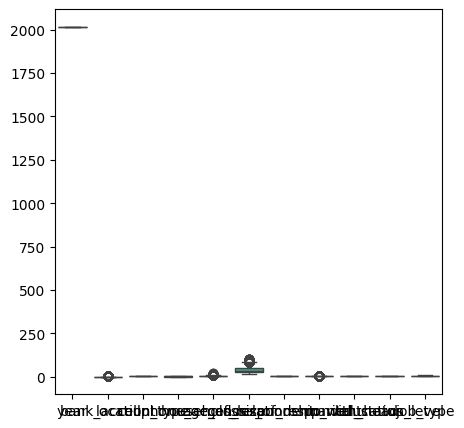

In [54]:
# Checking for outliers
plt.figure(figsize=(5,5))
sns.boxplot(data=df)

plt.show()

In [57]:
# Selecting relevant features
X = df.drop(['country', 'year', 'uniqueid', 'bank_account'], axis=1)
y = df['bank_account']
y.count()
X.head()

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,1,3,24,1,1,1,1,1
1,1,0,5,70,1,2,2,2,2
2,2,1,5,26,2,3,3,3,1
3,1,1,5,34,1,2,1,4,3
4,2,0,8,26,2,4,3,4,4


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [59]:
y.value_counts()

bank_account
0    20212
1     3312
Name: count, dtype: int64

In [60]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size= 0.20, random_state=0)

In [61]:
rf = RandomForestClassifier()

rf.fit(X_test, y_test)

RandomForestClassifier()

In [62]:
y_pred = rf.predict(X_test)

In [63]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9874601487778959
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4005
           1       0.97      0.94      0.96       700

    accuracy                           0.99      4705
   macro avg       0.98      0.97      0.97      4705
weighted avg       0.99      0.99      0.99      4705



In [66]:
# Saving the model
import pickle
pickle.dump(rf, open('model_saved', 'wb'))

In [67]:
#Loading the model 
loaded_model = pickle.load(open("C:/Users/mudia/OneDrive/Desktop/Finclusion/model_saved", 'rb')) 